# #Loading libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# #Importing dataset

In [20]:
data=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')


In [21]:
data

,id,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1
5,ID_6,-64,-55,-63,-66,-76,-88,-83,1
6,ID_7,-65,-61,-65,-67,-69,-87,-84,1
7,ID_8,-61,-63,-58,-66,-74,-87,-82,1
8,ID_9,-65,-60,-59,-63,-76,-86,-82,1
9,ID_10,-62,-60,-66,-68,-80,-86,-91,1


In [22]:
data.columns

Index(['id', 'wifi1', 'wifi2', 'wifi3', 'wifi4', 'wifi5', 'wifi6', 'wifi7',
       'room'],
      dtype='object')

Info gives the information about the datavalues other than null values and type of data of features. This can determine if some data is missing in testset and dataset. 

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
id       500 non-null object
wifi1    500 non-null int64
wifi2    500 non-null int64
wifi3    500 non-null int64
wifi4    500 non-null int64
wifi5    500 non-null int64
wifi6    500 non-null int64
wifi7    500 non-null int64
dtypes: int64(7), object(1)
memory usage: 31.3+ KB


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
id       1500 non-null object
wifi1    1500 non-null int64
wifi2    1500 non-null int64
wifi3    1500 non-null int64
wifi4    1500 non-null int64
wifi5    1500 non-null int64
wifi6    1500 non-null int64
wifi7    1500 non-null int64
room     1500 non-null int64
dtypes: int64(8), object(1)
memory usage: 105.5+ KB


Describe gives all the statistical information about the dataset from which we observed that the data is in about same range. So no scaling is required.

In [25]:
data.describe()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


# #Data Visualization

##Histogram
Histograms are plotted so as to check whether the given dataset is uniform on the features or not.


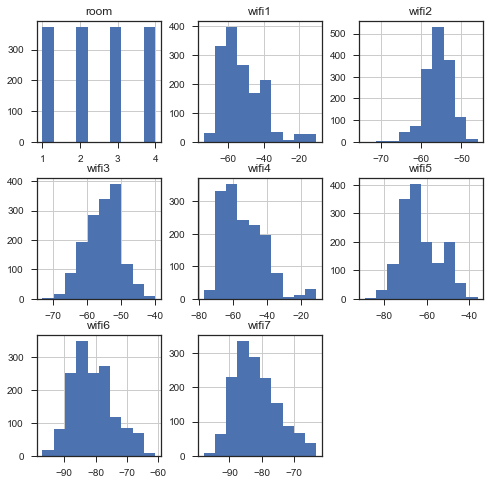

In [26]:
import matplotlib.pyplot as plt
data.hist(figsize=(8,8))
plt.show()

##Scatter plot:

Scatter plot is plotted to visualize the variation of data with all features. 

In [ ]:
import seaborn as sns
for var in data.columns:
    sns.pairplot(data, x_vars=var,y_vars='room',size=8,aspect=0.7)
    plt.show()
    print()

# CORRELATION

Heatmap is used to find the correlation between different features.using different colours, a heatmap also shows features' effect and realtion with target variable. 

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))

corr=data.corr()
sns.set(style='ticks',color_codes=True)
sns.heatmap(corr,linewidths=0.3,square=True,linecolor='white',annot=True)
plt.show()

Counting the number of datasets for different number of categories of room so as to get a glance of whether the dataset is uniformly distributed or not.

In [ ]:
p1=0
p2=0
p3=0
p4=0
room_c=data['room']
room_c

In [ ]:
for i in range(0,1500):
    if room_c[i]==1:
        p1+=1
    if room_c[i]==2:
        p2+=1
    if room_c[i]==3:
        p3+=1
    if room_c[i]==4:
        p4+=1

In [ ]:
print(p1)
print(p2)
print(p3)
print(p4)

Loading libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

The given train dataset is split into testset and trainset so as to check accuracy and cross validation score of various classifiers.Whicherver classifier has maximum mean cross validation score is choosen for fitting the train dataset.

In [ ]:
X=data.drop(['room','id'],axis=1)
y=data['room']
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
cv_scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')


cv_scores=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

In [ ]:
clf=tree.DecisionTreeRegressor()
cv_scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

In [ ]:
clf1=svm.SVC()
cv_scores=cross_val_score(clf1,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
cv_scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80)
cv_scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

As KNN and gradient boosting classifier gives approximately same cross validation score, either of the two can be used.

In [ ]:

knn.fit(train_x,train_y)
pred=knn.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

In [ ]:
clf=GradientBoostingClassifier(n_estimators=80)

clf.fit(train_x,train_y)
pred=clf.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Now working on the actual test dataset using knn model to predict the target value(here,room)

In [ ]:
test

In [ ]:
print(test)
idn=test['id']
print(idn)

Predictions are made using KNN model and the predictions are stored in a .csv file

In [ ]:
test.drop(['id'],axis=1,inplace=True)
prediction=knn.predict(test)

In [ ]:
prediction

In [ ]:
predi=pd.DataFrame(prediction)
predi.rename(columns={0:'Room'},inplace=True)
predi['Id']=idn
predi = predi[['Id','Room']]

In [ ]:
print(predi)

In [ ]:
predi.to_csv('wifi_result.csv',index=False)

In [ ]:
re=pd.read_csv('wifi_result.csv')
print(re)

In this notebook, knn and gradeint boosting classifier had approximately same accuracy and mean cross validation score. So both the models can be used for prediction but here the predictions are made using knn because of the lower complexity of knn than that of gradeint boosting classifier